# Task
Perform data preprocessing, exploratory data analysis, and machine learning modeling on the dataset contained within the `'/content/drive/MyDrive/CC-Partie B/archive(3).zip'` file.

## Unzip the archive and load data

### Subtask:
Unzip the provided archive file and identify the main data file (e.g., CSV). Load this data into a pandas DataFrame for further processing.


**Reasoning**:
The first step is to import the necessary libraries (`zipfile` and `os`) for handling zip files and creating directories. Then, create a directory to extract the contents of the zip file into.



In [7]:
import zipfile
import os

# Create a directory for extracted data if it doesn't exist
extract_dir = 'extracted_data'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

print(f"Created directory: {extract_dir}")

Created directory: extracted_data


**Reasoning**:
Now that the extraction directory is ready, the next step is to open the zip file, extract its contents to the 'extracted_data' directory, and then list the files to identify the primary data file.



In [8]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Contents extracted to: {extract_dir}/")

extracted_files = os.listdir(extract_dir)
print("Files in extracted_data directory:")
for file in extracted_files:
    print(f"- {file}")

Contents extracted to: extracted_data/
Files in extracted_data directory:
- Data Dictionary.xls
- cs-training.csv
- cs-test.csv
- sampleEntry.csv


**Reasoning**:
Based on the listed extracted files, `cs-training.csv` appears to be the primary dataset for training and analysis. The next step is to load this CSV file into a pandas DataFrame for further processing, which fulfills the last instruction of the subtask.



In [9]:
import pandas as pd

# Assuming 'cs-training.csv' is the main data file for initial analysis
data_file_path = os.path.join(extract_dir, 'cs-training.csv')
df = pd.read_csv(data_file_path)

print(f"Loaded '{os.path.basename(data_file_path)}' into a DataFrame.")
print("First 5 rows of the DataFrame:")
print(df.head())

Loaded 'cs-training.csv' into a DataFrame.
First 5 rows of the DataFrame:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  Number

## Data Preprocessing

### Subtask:
Perform initial data cleaning by checking for and removing duplicate rows, examining data types and descriptive statistics, and dropping any irrelevant identifier columns.


**Reasoning**:
The first step in data cleaning is to understand the dimensions of the dataset. Displaying the number of rows and columns provides a quick overview of the dataset's size.



In [10]:
print(f"Initial DataFrame shape: {df.shape[0]} rows, {df.shape[1]} columns")

Initial DataFrame shape: 150000 rows, 12 columns


**Reasoning**:
The next step is to identify the number of duplicate rows in the DataFrame to understand the extent of data redundancy before proceeding with removal.



In [11]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


**Reasoning**:
Since the previous step identified 0 duplicate rows, the next logical step is to perform the removal of duplicates (even if it doesn't change the DataFrame) and then confirm the number of rows to complete that instruction.



In [12]:
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape[0]} rows, {df.shape[1]} columns")

DataFrame shape after removing duplicates: 150000 rows, 12 columns


**Reasoning**:
The next step is to examine the data types of each column to understand their nature and identify any potential issues that might require type conversion.



In [13]:
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape[0]} rows, {df.shape[1]} columns")

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150

**Reasoning**:
After examining data types, the next logical step is to generate descriptive statistics for numerical columns, as specified in the subtask, to understand the distribution and central tendencies of the data.



In [14]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
st

**Reasoning**:
Based on the descriptive statistics, the 'Unnamed: 0' column appears to be a sequential index (min=1, max=150000, count=150000, mean=75000.5), which is redundant given that pandas DataFrames already have a built-in index. The next logical step is to confirm if it's a unique identifier for each row and then drop it as it is an irrelevant identifier column as per the subtask instructions.



In [15]:
if 'Unnamed: 0' in df.columns:
    if df['Unnamed: 0'].nunique() == len(df):
        df.drop('Unnamed: 0', axis=1, inplace=True)
        print("Dropped 'Unnamed: 0' column as it was an irrelevant index.")
    else:
        print("'Unnamed: 0' column exists but is not a unique index.")
else:
    print("'Unnamed: 0' column does not exist.")

print(f"DataFrame shape after dropping 'Unnamed: 0': {df.shape[0]} rows, {df.shape[1]} columns")

Dropped 'Unnamed: 0' column as it was an irrelevant index.
DataFrame shape after dropping 'Unnamed: 0': 150000 rows, 11 columns


## Impute missing values

### Subtask:
Impute missing values using advanced strategies.


**Reasoning**:
The first step in addressing missing values is to quantify them. This involves calculating both the absolute number and the percentage of missing values for each column, which will help in prioritizing and choosing appropriate imputation strategies.



In [16]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    '% of Total Values': missing_percentage
})

missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='% of Total Values', ascending=False)

print("Missing Values Information:")
print(missing_info)

Missing Values Information:
                    Missing Values  % of Total Values
MonthlyIncome                29731          19.820667
NumberOfDependents            3924           2.616000


**Reasoning**:
Based on the missing value analysis, 'MonthlyIncome' and 'NumberOfDependents' have missing values. Given that 'MonthlyIncome' is a continuous variable and 'NumberOfDependents' is a count, imputing with the median is a robust strategy that is less affected by outliers than the mean. This fulfills the instruction to implement a chosen imputation strategy.



In [17]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

print("Missing values imputed using median for 'MonthlyIncome' and 'NumberOfDependents'.")

Missing values imputed using median for 'MonthlyIncome' and 'NumberOfDependents'.


/tmp/ipython-input-2010325275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
/tmp/ipython-input-2010325275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

**Reasoning**:
The previous code generated a `FutureWarning` due to the use of `inplace=True` with chained assignment. To address this, I will modify the imputation logic to assign the result of `fillna()` directly back to the DataFrame columns, which is the recommended practice for pandas versions 1.5.0+.



In [18]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())

print("Missing values imputed using median for 'MonthlyIncome' and 'NumberOfDependents'.")

Missing values imputed using median for 'MonthlyIncome' and 'NumberOfDependents'.


**Reasoning**:
After performing the imputation, it's crucial to verify that all missing values have been successfully handled by rechecking the number of missing values, which is the final instruction of the subtask.



In [19]:
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Missing values after imputation:
Series([], dtype: int64)


## Handle special values and encode delinquency features

### Subtask:
Identify and handle special numerical codes in delinquency-related features by treating them as distinct categories and then applying one-hot encoding.


**Reasoning**:
The first step is to identify the delinquency-related columns and then replace specific high numerical values (like 96 and 98) with a categorical string 'VeryHighPastDue' in these columns. This prepares them for one-hot encoding by treating these special numbers as distinct categories, as specified in the instructions.



In [20]:
delinquency_cols = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse'
]

# Replace special values in delinquency columns
for col in delinquency_cols:
    df[col] = df[col].apply(lambda x: 'VeryHighPastDue' if x > 90 else x)

print("Special values in delinquency columns replaced with 'VeryHighPastDue'.")
print("Data types after replacement for delinquency columns:")
print(df[delinquency_cols].dtypes)


Special values in delinquency columns replaced with 'VeryHighPastDue'.
Data types after replacement for delinquency columns:
NumberOfTime30-59DaysPastDueNotWorse    object
NumberOfTimes90DaysLate                 object
NumberOfTime60-89DaysPastDueNotWorse    object
dtype: object


**Reasoning**:
Now that the special values in the delinquency columns have been replaced and their data types are `object`, the next step is to apply one-hot encoding to these columns using `pd.get_dummies()`, and then concatenate the resulting new columns with the original DataFrame. Finally, the original delinquency columns will be dropped to complete the one-hot encoding process as per the instructions.



In [21]:
delinquency_encoded = pd.get_dummies(df[delinquency_cols], prefix=delinquency_cols, drop_first=False)
df = pd.concat([df, delinquency_encoded], axis=1)
df.drop(columns=delinquency_cols, inplace=True)

print("One-hot encoding applied to delinquency columns and original columns dropped.")
print("New DataFrame shape:", df.shape)
print("First 5 rows of the updated DataFrame:")
print(df.head())

One-hot encoding applied to delinquency columns and original columns dropped.
New DataFrame shape: (150000, 53)
First 5 rows of the updated DataFrame:
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  DebtRatio  \
0                 1                              0.766127   45   0.802982   
1                 0                              0.957151   40   0.121876   
2                 0                              0.658180   38   0.085113   
3                 0                              0.233810   30   0.036050   
4                 0                              0.907239   49   0.024926   

   MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
0         9120.0                               13   
1         2600.0                                4   
2         3042.0                                2   
3         3300.0                                5   
4        63588.0                                7   

   NumberRealEstateLoansOrLines  NumberOfDependents  \
0           

## Normalize or standardize numerical data

### Subtask:
Normalize or standardize numerical features in the DataFrame.


**Reasoning**:
The first step is to identify all numerical columns in the DataFrame by checking their data types and then exclude the target variable 'SeriousDlqin2yrs' and the one-hot encoded delinquency features to determine which columns require scaling.



In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable
if 'SeriousDlqin2yrs' in numerical_cols:
    numerical_cols.remove('SeriousDlqin2yrs')

# Exclude one-hot encoded delinquency columns (they are boolean now, which means they are already numerical)
# Re-check the list of delinquency_cols which were originally categorical and now are one-hot encoded.
# The one-hot encoded columns are of type bool and are already implicitly handled or will be excluded later if not explicitly numeric
# However, if any numeric values were left unencoded in delinquency_cols (which was handled by conversion to object then one-hot encoding),
# we need to make sure we don't scale the one-hot encoded versions. They should already be excluded by `select_dtypes` if they are boolean.

# Let's ensure to not scale the one-hot encoded columns (which are boolean/int and derived from previous step)
# We can identify them by checking their data type explicitly.

# Filter out boolean columns from the numerical_cols list
# This ensures that our one-hot encoded columns (which are typically boolean or 0/1 integers) are not scaled unnecessarily.

# Get the list of one-hot encoded columns
one_hot_cols = [col for col in df.columns if any(del_col in col for del_col in delinquency_cols)]

# Remove one-hot encoded columns from the numerical_cols list, if they are still there and numeric
scaling_cols = [col for col in numerical_cols if col not in one_hot_cols]

print("Numerical columns identified for scaling (excluding target and one-hot encoded):")
print(scaling_cols)

Numerical columns identified for scaling (excluding target and one-hot encoded):
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']


**Reasoning**:
Now that the numerical columns to be scaled have been identified, the next step is to import `StandardScaler`, initialize it, and apply `fit_transform` to these columns in the DataFrame to standardize them. This fulfills instructions 2, 3, and 4 of the subtask.



In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[scaling_cols] = scaler.fit_transform(df[scaling_cols])

print("Numerical columns scaled using StandardScaler.")

Numerical columns scaled using StandardScaler.


**Reasoning**:
After scaling the numerical columns, the final step in this subtask is to print the descriptive statistics of these scaled columns. This will allow us to verify that the standardization has been successfully applied, as indicated by their mean being close to 0 and standard deviation close to 1, fulfilling instruction 5 of the subtask.



In [24]:
print("Descriptive statistics of scaled numerical columns:")
print(df[scaling_cols].describe())

Descriptive statistics of scaled numerical columns:
       RevolvingUtilizationOfUnsecuredLines           age     DebtRatio  \
count                          1.500000e+05  1.500000e+05  1.500000e+05   
mean                          -5.494864e-18  9.274951e-17 -2.415845e-18   
std                            1.000003e+00  1.000003e+00  1.000003e+00   
min                           -2.421753e-02 -3.540201e+00 -1.732275e-01   
25%                           -2.409794e-02 -7.646457e-01 -1.731416e-01   
50%                           -2.360020e-02 -1.998445e-02 -1.730477e-01   
75%                           -2.197915e-02  7.246768e-01 -1.728015e-01   
max                            2.030071e+02  3.838715e+00  1.616003e+02   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.500000e+05                     1.500000e+05   
mean   -9.047578e-18                     8.014922e-17   
std     1.000003e+00                     1.000003e+00   
min    -4.979270e-01                    -1.6

## Visualize data distributions (histograms and count plot)

### Subtask:
Plot histograms for the scaled numerical features and a count plot for the target variable to understand their distributions.


**Reasoning**:
The first step is to import the necessary visualization libraries, `matplotlib.pyplot` and `seaborn`, to enable plotting of data distributions as required by the subtask.



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported matplotlib.pyplot as plt and seaborn as sns.")

Imported matplotlib.pyplot as plt and seaborn as sns.


**Reasoning**:
Now that the libraries are imported, the next step is to create a series of histograms for each of the scaled numerical features in `scaling_cols`, as specified in the instructions. This involves setting up subplots, plotting each histogram, adding titles, and ensuring a proper layout.



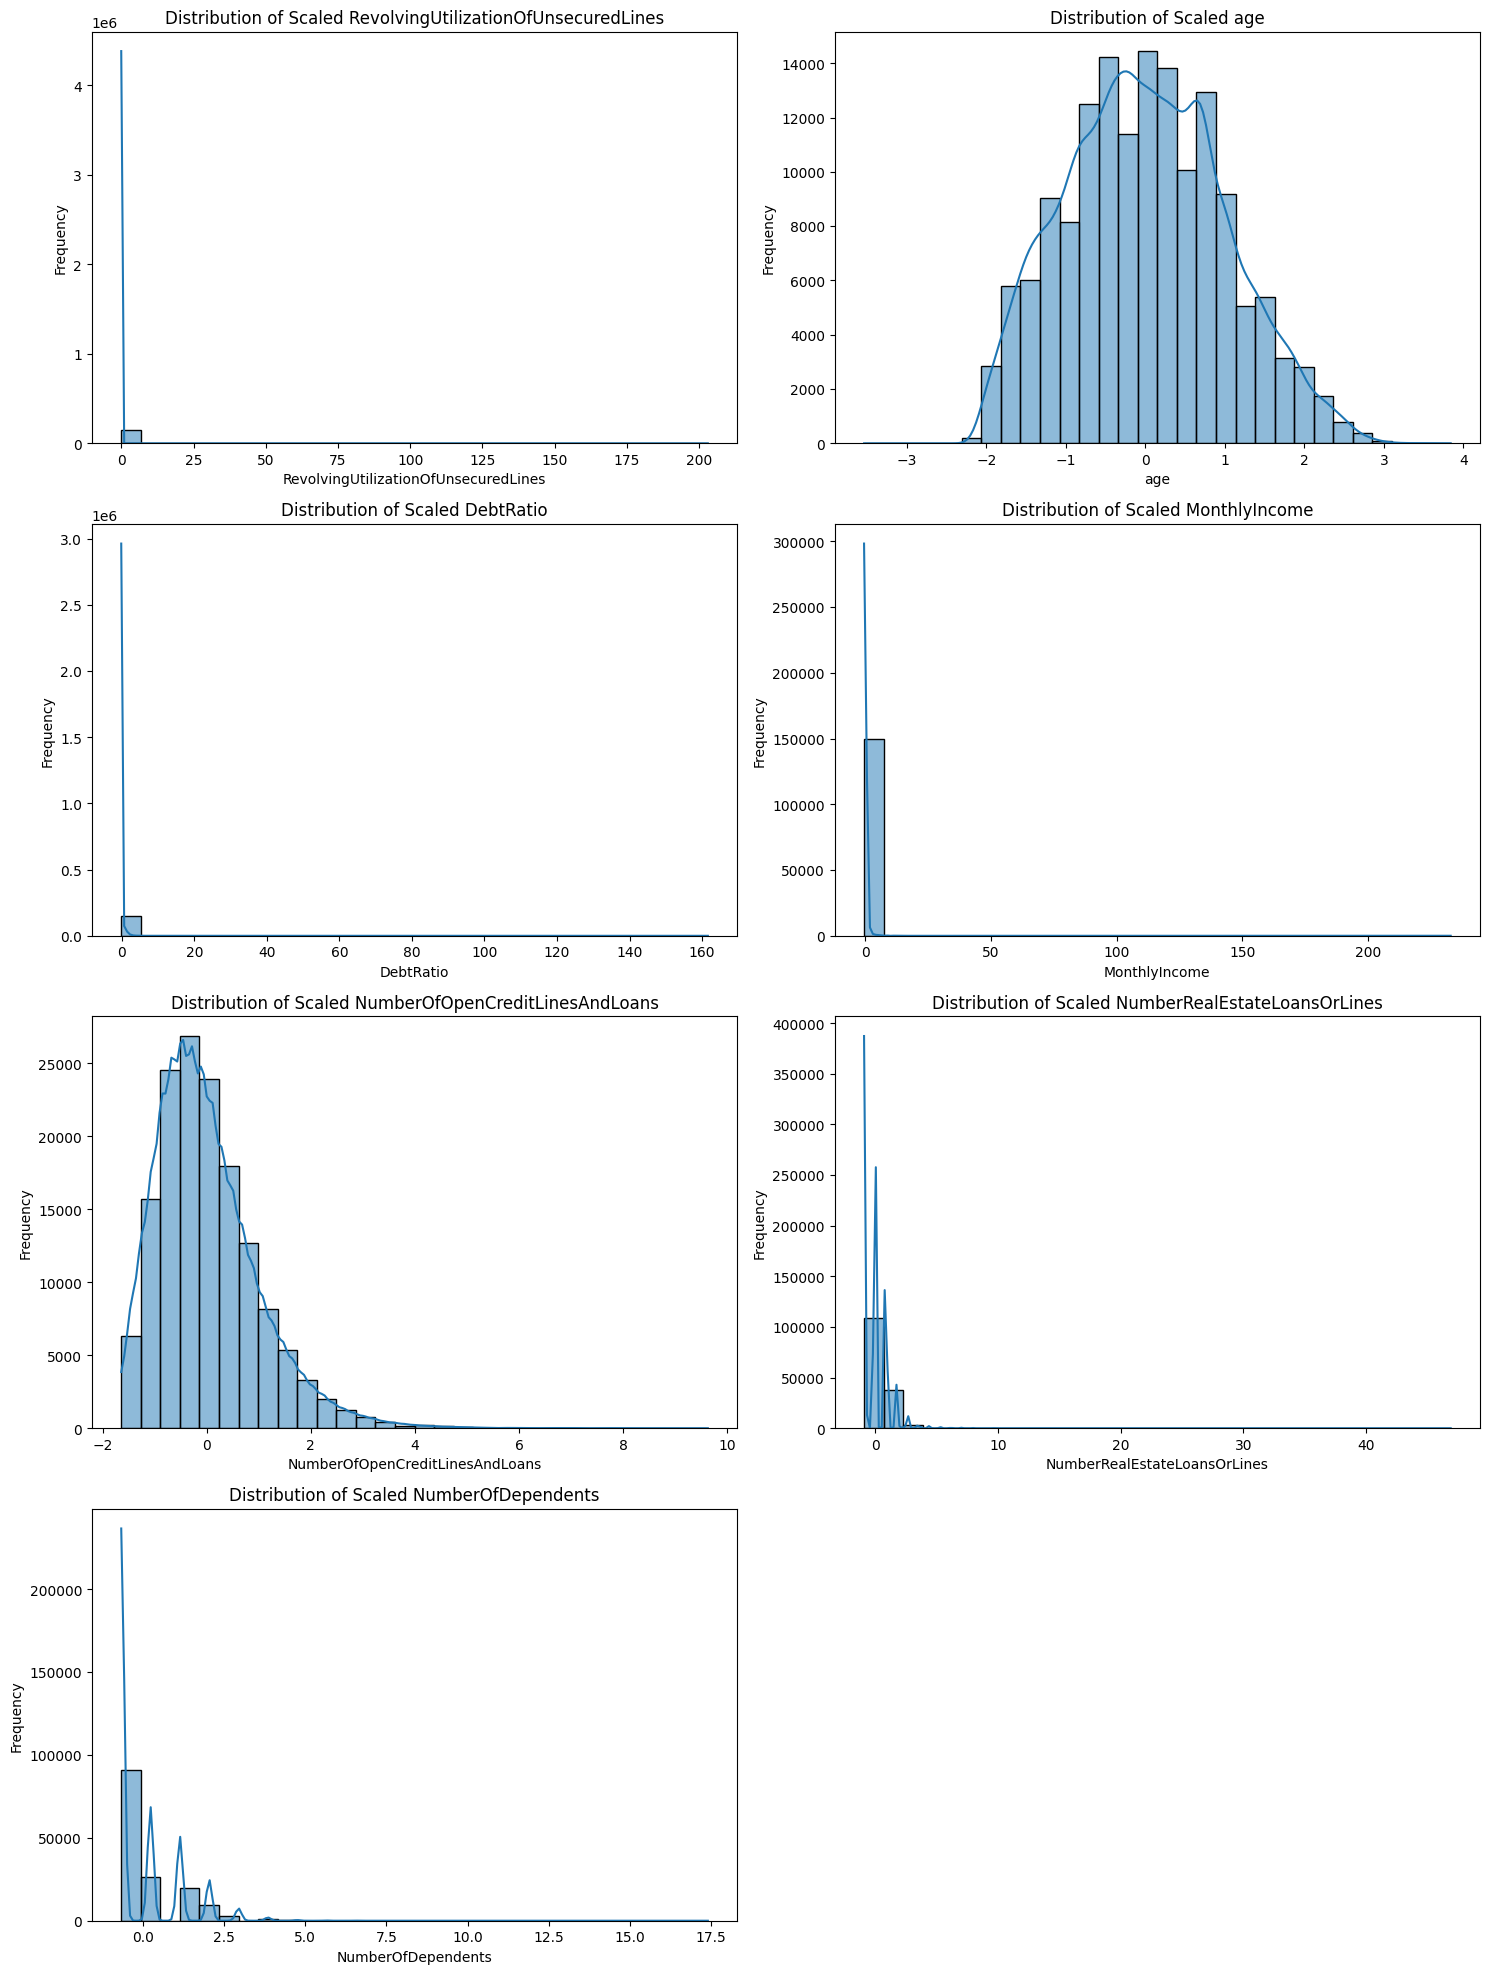

Histograms for scaled numerical features displayed.


In [26]:
num_plots = len(scaling_cols)
num_rows = (num_plots + 1) // 2  # Arrange in 2 columns
num_cols = 2

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(scaling_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of Scaled {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for scaled numerical features displayed.")

**Reasoning**:
The histograms for numerical features have been displayed. Now, as per the subtask instructions, the next step is to create a separate count plot for the target variable 'SeriousDlqin2yrs' to visualize its class distribution, adding appropriate titles and labels.



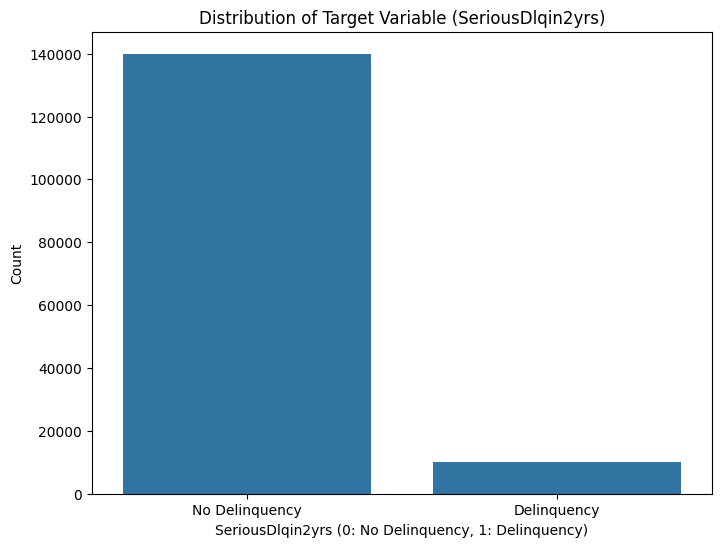

Count plot for the target variable displayed.


In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribution of Target Variable (SeriousDlqin2yrs)')
plt.xlabel('SeriousDlqin2yrs (0: No Delinquency, 1: Delinquency)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Delinquency', 'Delinquency'])
plt.show()

print("Count plot for the target variable displayed.")

## Visualize data distributions (boxplots)

### Subtask:
Plot boxplots for the scaled numerical features to identify outliers and understand their spread.


**Reasoning**:
Following the instructions, I will generate boxplots for each scaled numerical feature to visualize outliers and data spread. This involves setting up subplots, iterating through `scaling_cols`, creating a boxplot for each, and ensuring a proper layout.



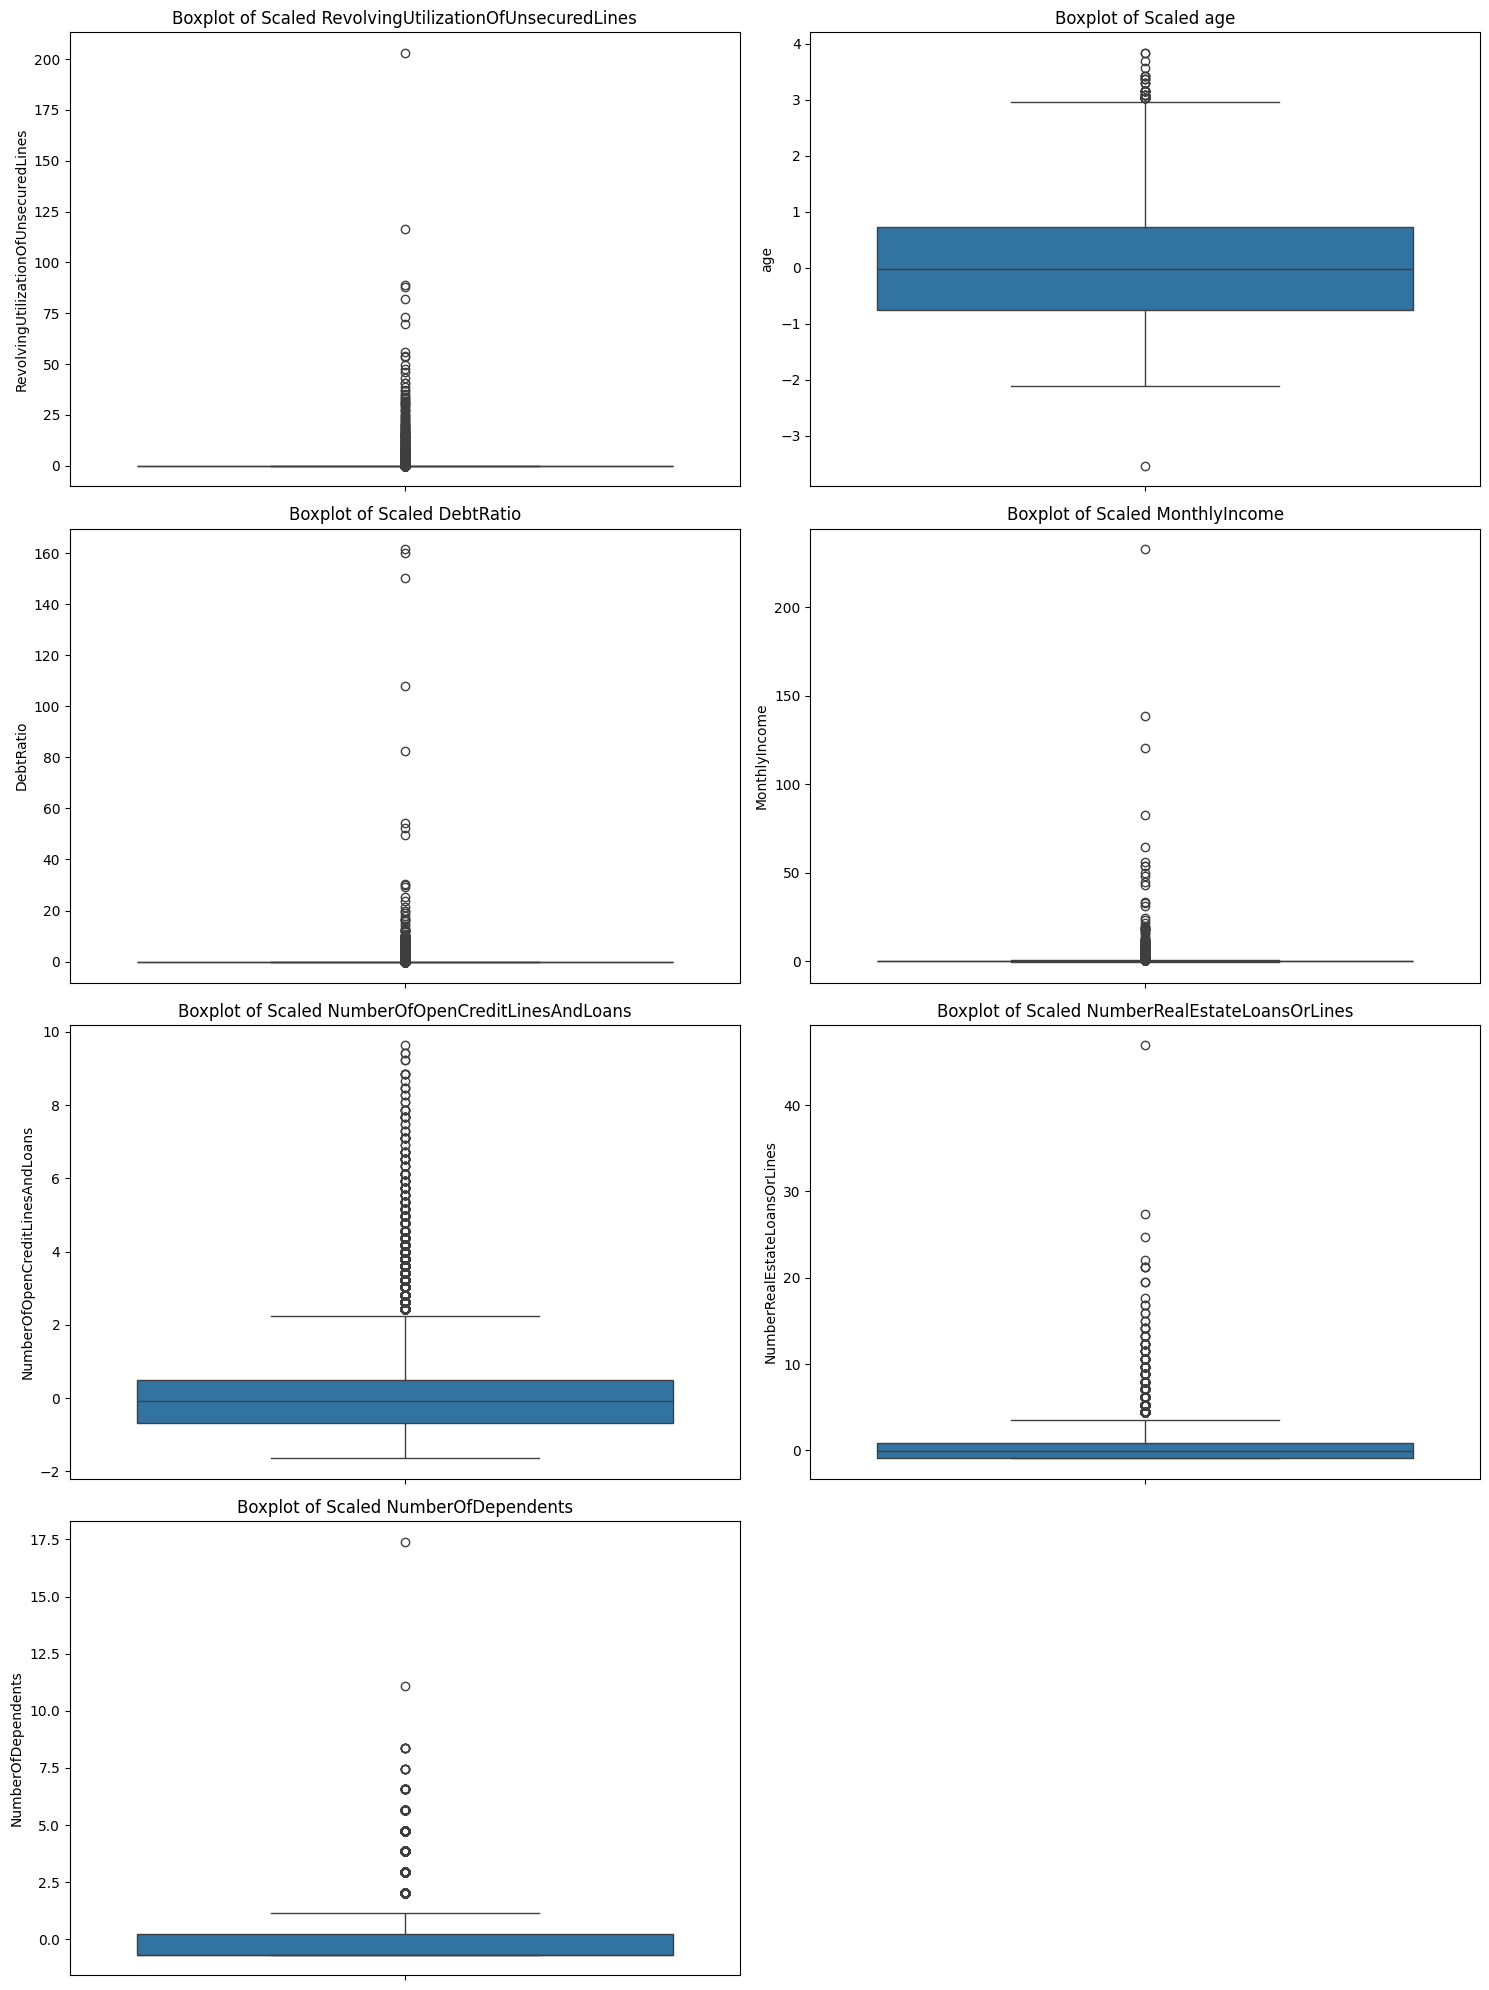

Boxplots for scaled numerical features displayed.


In [28]:
num_plots = len(scaling_cols)
num_rows = (num_plots + 1) // 2  # Arrange in 2 columns
num_cols = 2

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(scaling_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of Scaled {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("Boxplots for scaled numerical features displayed.")

## Analyze correlations (Heatmap)

### Subtask:
Analyze correlations between features using a heatmap.


**Reasoning**:
To analyze correlations as per the subtask, the first step is to calculate the correlation matrix for all relevant numerical features in the DataFrame, including the target variable and the newly created one-hot encoded columns.



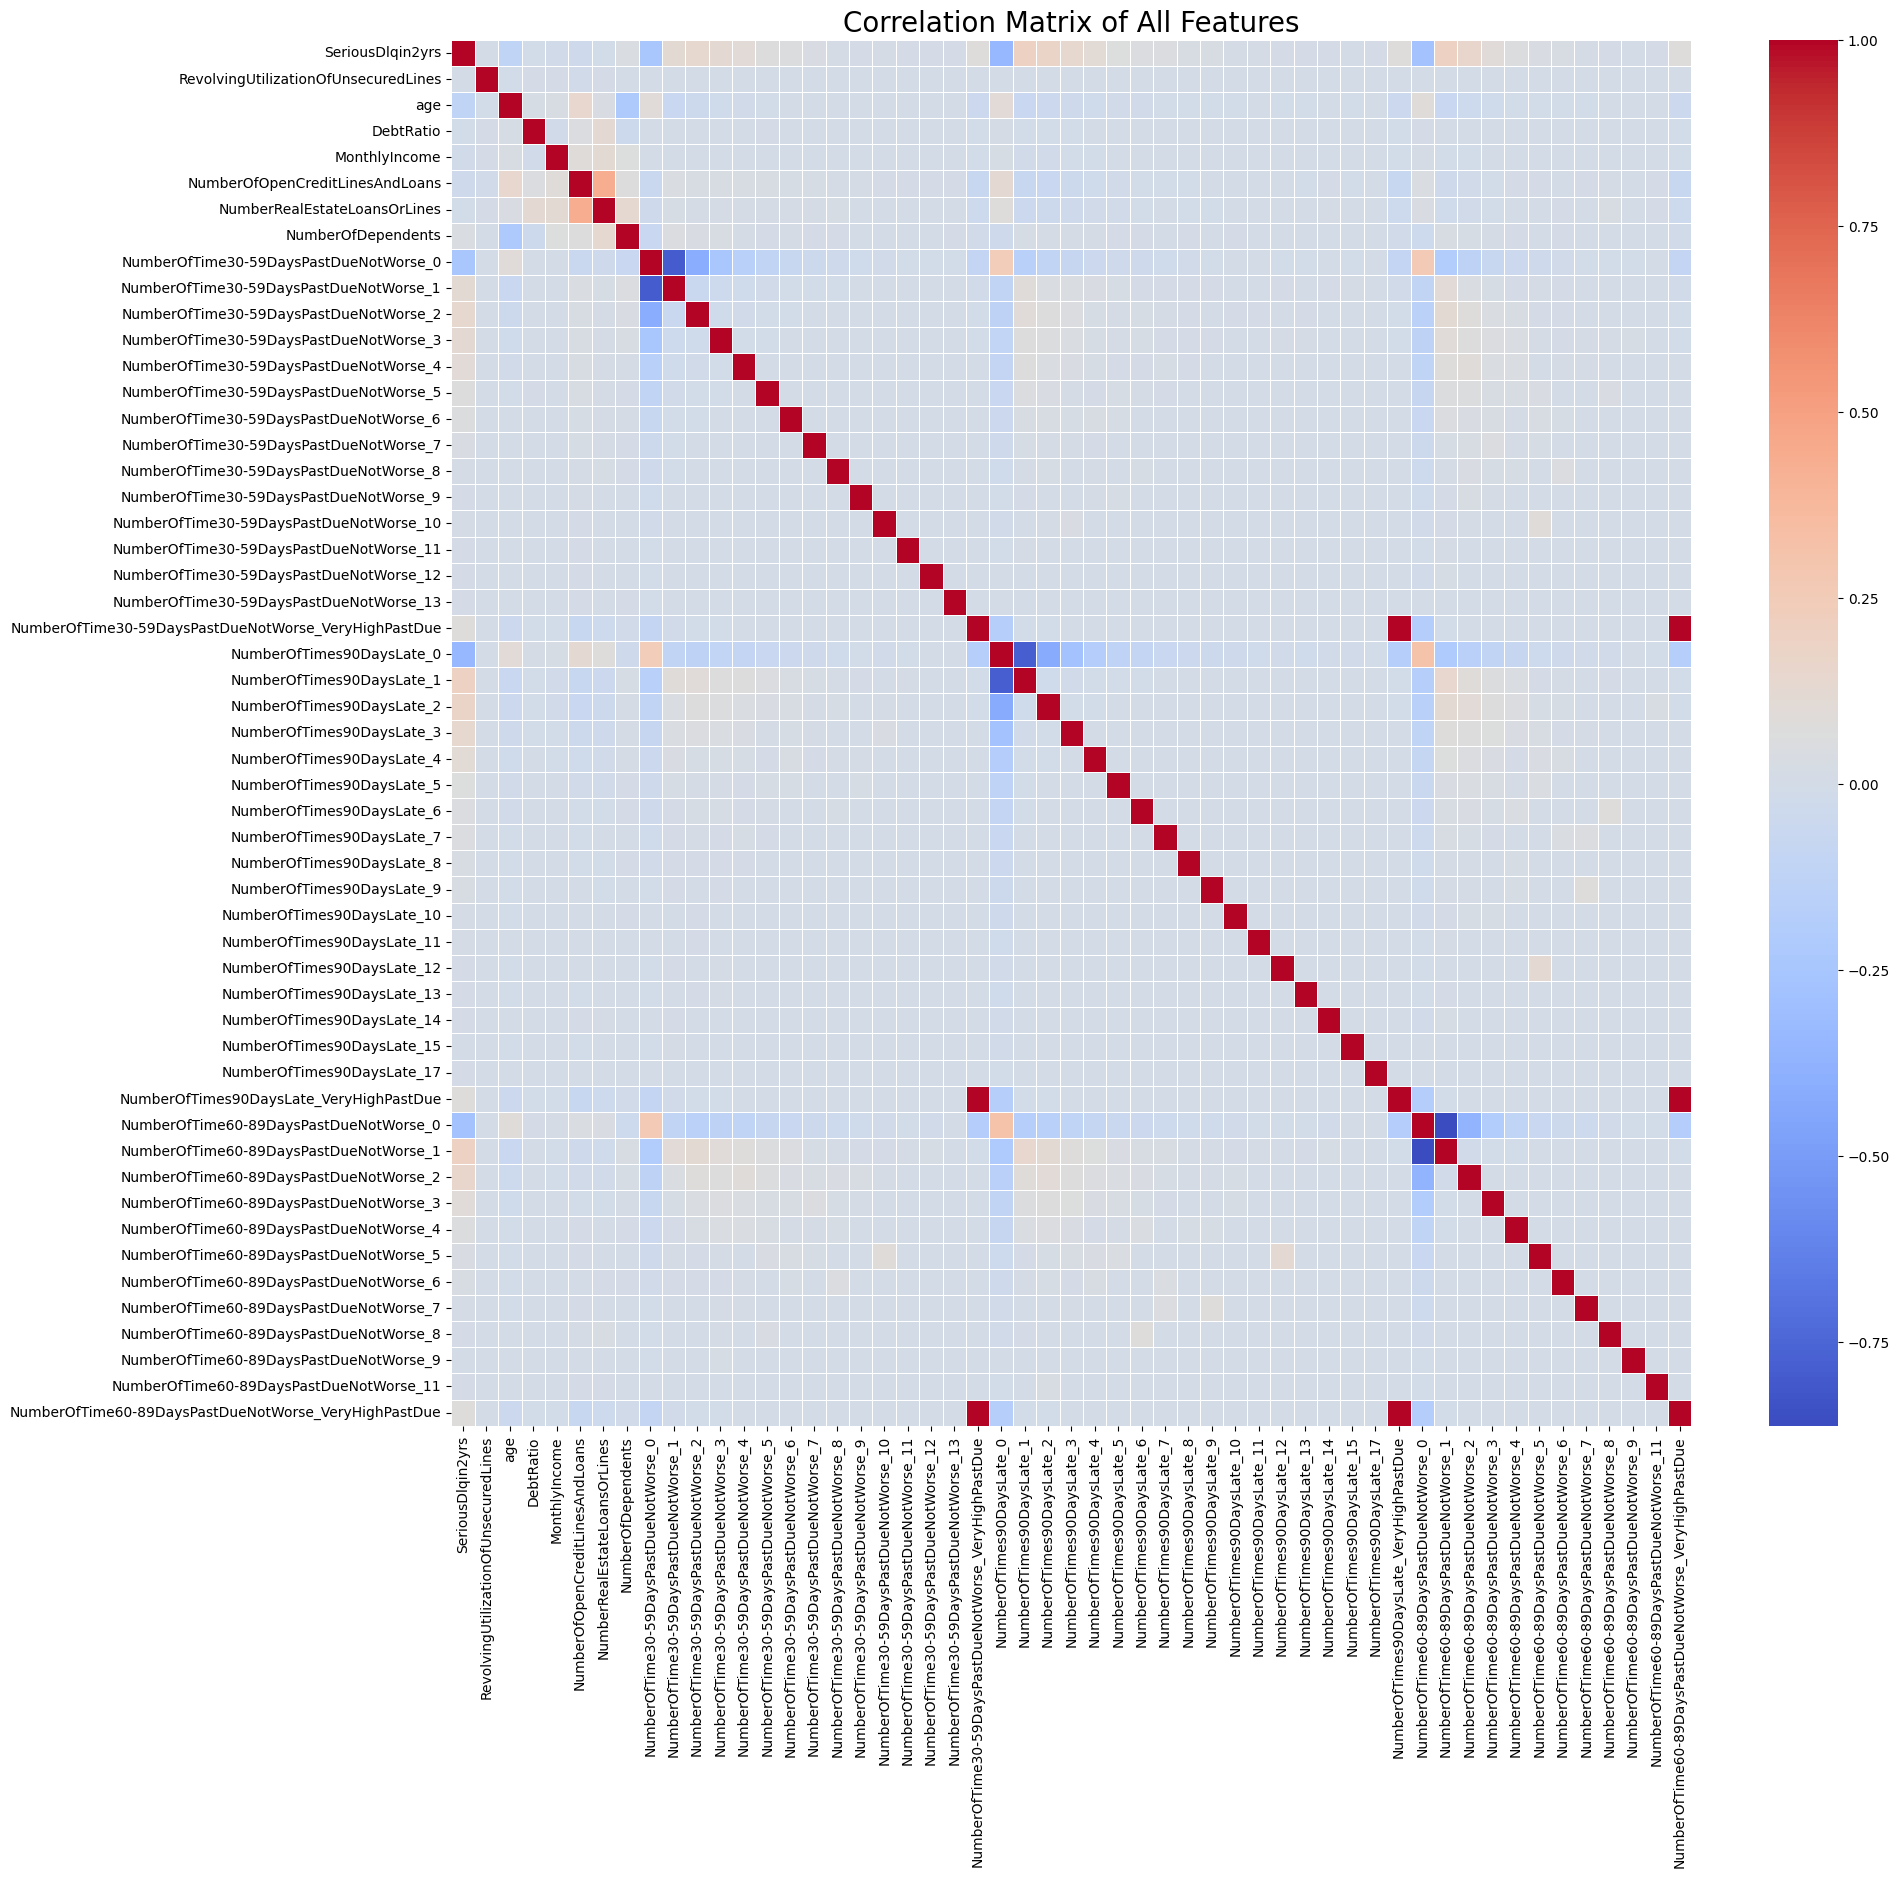

Correlation matrix heatmap displayed.


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select all numerical and boolean columns for correlation analysis
# This includes the scaled features, one-hot encoded features, and the target variable.
correlation_cols = df.select_dtypes(include=['number', 'bool']).columns

# Calculate the correlation matrix
corr_matrix = df[correlation_cols].corr()

# Set up the matplotlib figure and axes for the heatmap
plt.figure(figsize=(20, 18)) # Adjust figure size for better readability with many features

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of All Features', fontsize=20)

# Display the plot
plt.show()

print("Correlation matrix heatmap displayed.")

**Reasoning**:
The previous heatmap was generated without annotations (`annot=False`), but the instructions specifically ask for annotations for correlation values. Therefore, I will regenerate the heatmap with `annot=True` to include these annotations, ensuring all instructions are met.



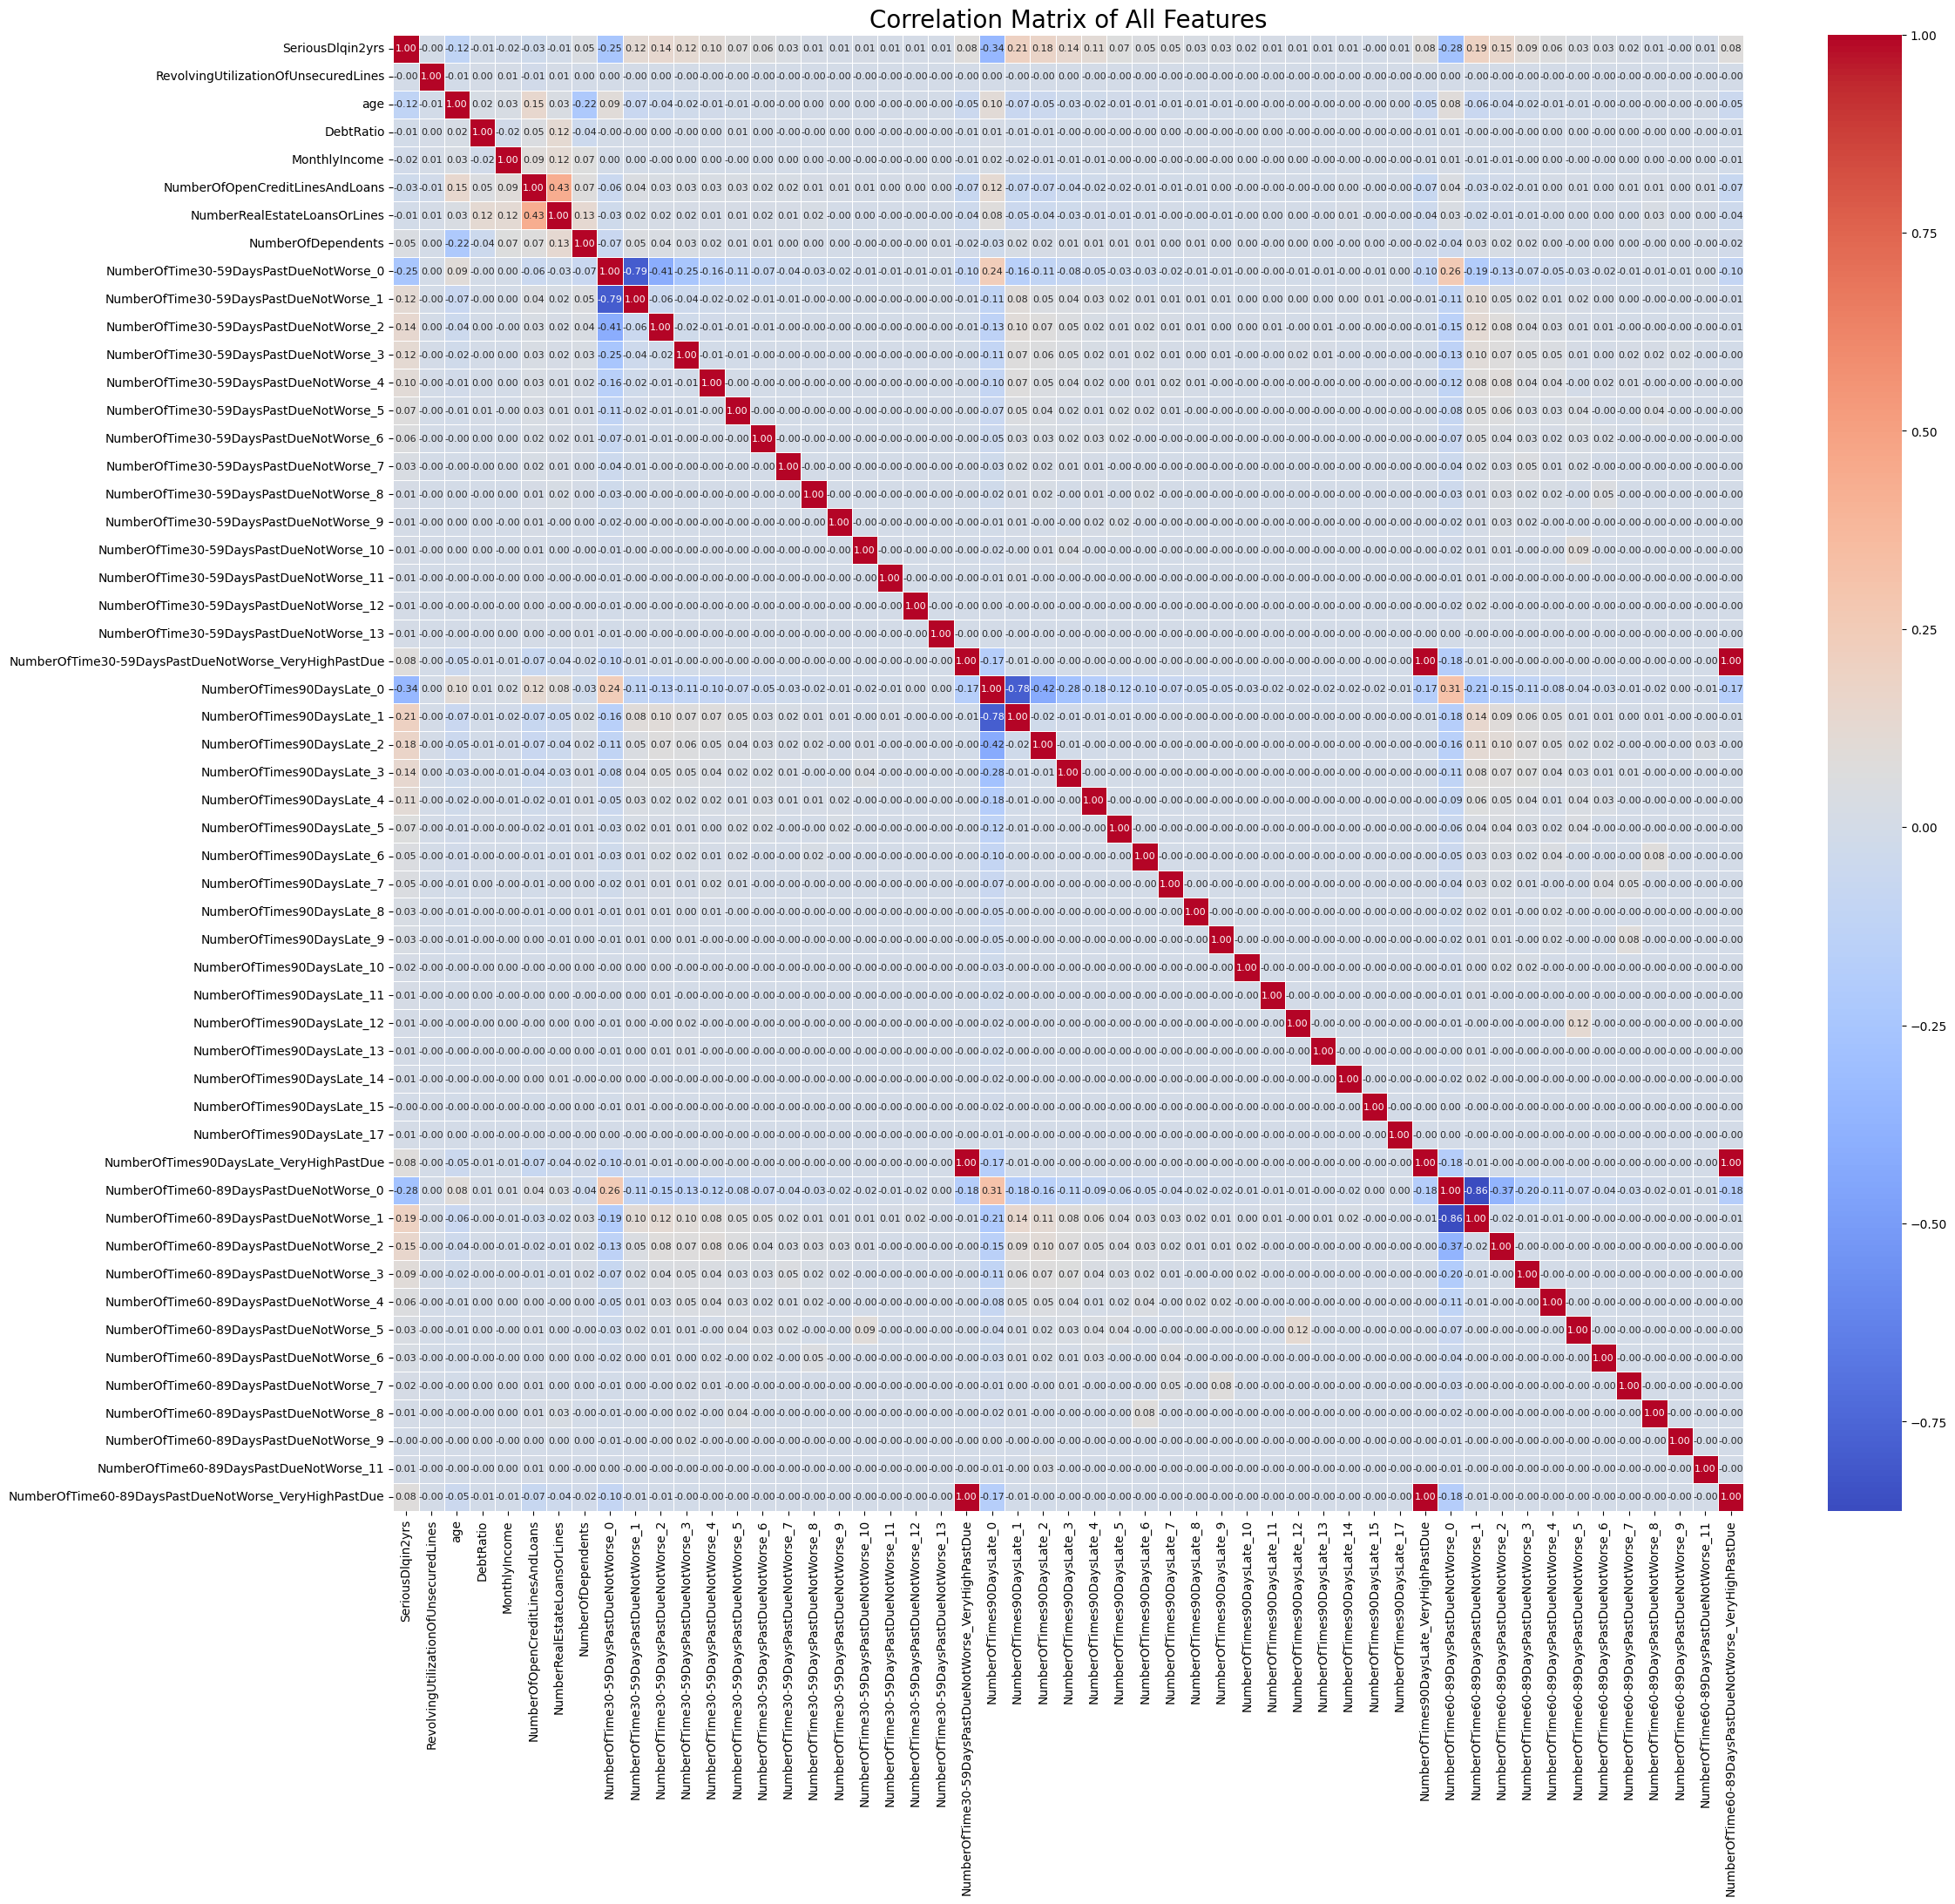

Correlation matrix heatmap displayed with annotations.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select all numerical and boolean columns for correlation analysis
correlation_cols = df.select_dtypes(include=['number', 'bool']).columns

# Calculate the correlation matrix
corr_matrix = df[correlation_cols].corr()

# Set up the matplotlib figure and axes for the heatmap
plt.figure(figsize=(25, 22)) # Adjusted figure size slightly for better annotation readability

# Create the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8}) # Added annot=True and annot_kws to control annotation size

# Add a title to the heatmap
plt.title('Correlation Matrix of All Features', fontsize=20)

# Display the plot
plt.show()

print("Correlation matrix heatmap displayed with annotations.")

## Feature Engineering by creating new relevant variables

### Subtask:
Create new binary features based on high percentiles of key numerical variables.


**Reasoning**:
First, I will calculate the 99th percentile for the specified scaled numerical columns: 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', and 'MonthlyIncome'. This is a prerequisite for creating the binary features as per the instructions.



In [31]:
p99_revolving = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)
p99_debt_ratio = df['DebtRatio'].quantile(0.99)
p99_monthly_income = df['MonthlyIncome'].quantile(0.99)

print(f"99th percentile for RevolvingUtilizationOfUnsecuredLines: {p99_revolving:.4f}")
print(f"99th percentile for DebtRatio: {p99_debt_ratio:.4f}")
print(f"99th percentile for MonthlyIncome: {p99_monthly_income:.4f}")

99th percentile for RevolvingUtilizationOfUnsecuredLines: -0.0198
99th percentile for DebtRatio: 2.2701
99th percentile for MonthlyIncome: 1.2864


**Reasoning**:
Now that the 99th percentiles have been calculated, the next step is to create the specified binary features ('High_RevolvingUtilization_Flag', 'High_DebtRatio_Flag', and 'High_MonthlyIncome_Flag') by comparing the respective columns with their calculated 99th percentiles, as per the instructions.



In [32]:
df['High_RevolvingUtilization_Flag'] = (df['RevolvingUtilizationOfUnsecuredLines'] > p99_revolving).astype(int)
df['High_DebtRatio_Flag'] = (df['DebtRatio'] > p99_debt_ratio).astype(int)
df['High_MonthlyIncome_Flag'] = (df['MonthlyIncome'] > p99_monthly_income).astype(int)

print("New binary features 'High_RevolvingUtilization_Flag', 'High_DebtRatio_Flag', and 'High_MonthlyIncome_Flag' created.")

New binary features 'High_RevolvingUtilization_Flag', 'High_DebtRatio_Flag', and 'High_MonthlyIncome_Flag' created.


**Reasoning**:
After creating the binary features, the final step in this subtask is to print the value counts for each of these newly created binary features to examine their distribution, as specified in the instructions.



In [33]:
print("Value counts for new binary features:")
print("\nHigh_RevolvingUtilization_Flag value counts:")
print(df['High_RevolvingUtilization_Flag'].value_counts())

print("\nHigh_DebtRatio_Flag value counts:")
print(df['High_DebtRatio_Flag'].value_counts())

print("\nHigh_MonthlyIncome_Flag value counts:")
print(df['High_MonthlyIncome_Flag'].value_counts())

Value counts for new binary features:

High_RevolvingUtilization_Flag value counts:
High_RevolvingUtilization_Flag
0    148500
1      1500
Name: count, dtype: int64

High_DebtRatio_Flag value counts:
High_DebtRatio_Flag
0    148500
1      1500
Name: count, dtype: int64

High_MonthlyIncome_Flag value counts:
High_MonthlyIncome_Flag
0    148501
1      1499
Name: count, dtype: int64


## Split data into training and testing sets

### Subtask:
Split the preprocessed data into training and testing sets to prepare for machine learning modeling.


**Reasoning**:
The first step is to separate the features (X) from the target variable (y), where 'SeriousDlqin2yrs' is the target variable, as per the instructions.



In [34]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

print("Features (X) and target (y) separated.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features (X) and target (y) separated.
Shape of X: (150000, 55)
Shape of y: (150000,)


**Reasoning**:
The next step is to import the `train_test_split` function from `sklearn.model_selection` to enable splitting the data into training and testing sets, as required by the subtask instructions.



In [35]:
from sklearn.model_selection import train_test_split

print("Imported train_test_split from sklearn.model_selection.")

Imported train_test_split from sklearn.model_selection.


**Reasoning**:
Now that the `train_test_split` function is imported, the next step is to split the `X` and `y` data into training and testing sets using a `test_size` of 0.2 and `stratify=y` for class balance, as well as a `random_state` for reproducibility, as specified in the instructions.



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (120000, 55)
Shape of X_test: (30000, 55)
Shape of y_train: (120000,)
Shape of y_test: (30000,)


## Test and compare at least three different machine learning algorithms.

### Subtask:
Train and evaluate three different machine learning algorithms (Logistic Regression, Random Forest, Gradient Boosting) on the preprocessed training and testing data.


**Reasoning**:
The first step is to import all the necessary machine learning models and evaluation metrics from `sklearn` as specified in instructions 1 and 2, which are prerequisites for training and evaluating the models.



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Imported LogisticRegression, RandomForestClassifier, GradientBoostingClassifier.")
print("Imported accuracy_score, precision_score, recall_score, f1_score, roc_auc_score.")

Imported LogisticRegression, RandomForestClassifier, GradientBoostingClassifier.
Imported accuracy_score, precision_score, recall_score, f1_score, roc_auc_score.


**Reasoning**:
Now that the necessary libraries are imported, the next step is to instantiate each of the three models (Logistic Regression, Random Forest, and Gradient Boosting), train them on the `X_train` and `y_train` data, make predictions on `X_test`, calculate their performance metrics (accuracy, precision, recall, F1-score, and ROC AUC score), and then print these metrics for comparison, fulfilling instructions 3, 4, 5, 6, and 7 of the subtask.



In [38]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # Added solver to suppress warning
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")

print("\n--- Model Performance Comparison ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")



--- Training Logistic Regression ---
Logistic Regression Metrics:
  Accuracy: 0.9365
  Precision: 0.5852
  Recall: 0.1731
  F1-Score: 0.2671
  ROC AUC: 0.8305

--- Training Random Forest ---
Random Forest Metrics:
  Accuracy: 0.9358
  Precision: 0.5601
  Recall: 0.1860
  F1-Score: 0.2793
  ROC AUC: 0.8418

--- Training Gradient Boosting ---
Gradient Boosting Metrics:
  Accuracy: 0.9372
  Precision: 0.5924
  Recall: 0.1935
  F1-Score: 0.2917
  ROC AUC: 0.8666

--- Model Performance Comparison ---

Logistic Regression:
  Accuracy: 0.9365
  Precision: 0.5852
  Recall: 0.1731
  F1-Score: 0.2671
  ROC AUC: 0.8305

Random Forest:
  Accuracy: 0.9358
  Precision: 0.5601
  Recall: 0.1860
  F1-Score: 0.2793
  ROC AUC: 0.8418

Gradient Boosting:
  Accuracy: 0.9372
  Precision: 0.5924
  Recall: 0.1935
  F1-Score: 0.2917
  ROC AUC: 0.8666


## Implement Cross-Validation and Hyperparameter Optimization

### Subtask:
Implement a rigorous validation strategy using cross-validation and optimize hyperparameters using GridSearchCV or RandomizedSearchCV for one of the models.


**Reasoning**:
The first step in implementing cross-validation and hyperparameter optimization is to import the necessary classes: `GridSearchCV` and `StratifiedKFold` from `sklearn.model_selection`, as specified in the instructions.



In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

print("Imported GridSearchCV and StratifiedKFold.")

Imported GridSearchCV and StratifiedKFold.


**Reasoning**:
Now that the necessary classes are imported, the next step is to choose one of the previously trained models (Gradient Boosting Classifier) for hyperparameter tuning and define a parameter grid with a few key hyperparameters, as per the instructions.



In [40]:
model_to_tune = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

print("Gradient Boosting Classifier chosen for tuning and parameter grid defined.")

Gradient Boosting Classifier chosen for tuning and parameter grid defined.


**Reasoning**:
Now that the model and parameter grid are defined, the next step is to instantiate `StratifiedKFold` with specified parameters to ensure stratified cross-validation for hyperparameter tuning, as per the instructions.



In [41]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("StratifiedKFold cross-validation strategy instantiated.")

StratifiedKFold cross-validation strategy instantiated.


**Reasoning**:
Now that the model, parameter grid, and cross-validation strategy are defined, the next step is to initialize `GridSearchCV` with these components, specify 'roc_auc' as the scoring metric, and use `n_jobs=-1` for parallel processing, as specified in the instructions.



In [42]:
grid_search = GridSearchCV(
    estimator=model_to_tune,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

print("GridSearchCV initialized.")

GridSearchCV initialized.


**Reasoning**:
Now that GridSearchCV is initialized, the next step is to fit the search object to the training data (`X_train`, `y_train`) to perform the hyperparameter optimization, as per the instructions.



In [ ]:
print("Fitting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete.")

Fitting GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


**Reasoning**:
Now that GridSearchCV has completed fitting, the next logical step is to retrieve and print the best parameters found during the search, as specified in the instructions.



In [ ]:
print(f"Best parameters found: {grid_search.best_params_}")